# CS 4820
# Tutorial 9: Padding, Stride, and Pooling in Convolution

### Load a Gray Scale Image

In [1]:
# allow multiple outputs be displayed for each cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

First of all, let's load an example gray scale image from [`scipy.misc`](https://docs.scipy.org/doc/scipy/reference/misc.html):

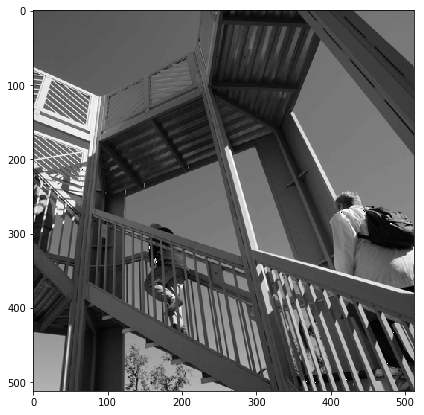

In [3]:
from scipy import misc
import matplotlib.pyplot as plt

img = misc.ascent()

plt.figure(figsize=(7, 7)) # Note: (7, 7) is the dimension of the figure shown below instead of dimension of the image itself
plt.imshow(img, cmap='gray');

In [4]:
img.shape # Note: (512, 512) is the dimension of the image

(512, 512)

A convolutional layer wants an order-4 tensor as input, so first of all we need to reshape our image so that it has 4 axes and not 2. 

We can add one axis of length <span style="color:red">1</span> for the input color channel (which is a grayscale pixel value between 0 and 255) and one axis of length <span style="color:blue">1</span> for the dataset index.

> Slide 4 of `CNN Intuition`: $(N, H, W, C)$=(<span style="color:blue">1</span>, 512, 512, <span style="color:red">1</span>)

In [5]:
img_tensor = img.reshape((1, 512, 512, 1))

### One convolutional Layer with (default) valid padding and 1 stride

Convolutional layers are available in [`keras.layers.Conv2D`](https://keras.io/layers/convolutional/). Let's apply a convolutional layer to the image we loaded above and see what happens.

First, let's import the `Conv2D` layer from keras:

In [7]:
from tensorflow.keras.layers import Conv2D

Let's start by applying one large flat filter of size 11x11 pixels. This operation should result in a blurring of the image because the pixels are averaged (technically they are totalled).

The syntax of[`Conv2D`](https://keras.io/layers/convolutional/) is:

       Conv2D(filters, kernel_size, input_shape, ...)

so we will specify <span style="color:purple">1</span> for the `filter` (aka. channels in output) of and (11, 11) for the `kernel_size`. We will also initialize all the weights to one by using `kernel_initializer='ones'`. Finally we will need to pass the input shape, since this is the first layer in the network. This is the shape of a __single image__, which in this case is (512, 512, <span style="color:red">1<span>).

> Slide 12 of `CNN Intuition`: $(H_f, W_f, C_i, C_o)$=(11, 11, <span style="color:red">1</span>, <span style="color:purple">1</span>)

In [8]:
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Conv2D(1, (11,11), kernel_initializer='ones',
                 input_shape=(512, 512, 1)))
model.compile('adam', 'mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 502, 502, 1)       122       
Total params: 122
Trainable params: 122
Non-trainable params: 0
_________________________________________________________________


__Q: Why `Output Shape = (None, 502, 502, 1)`?__

__A:__ 

The first value `None` is the number of images per patch in the training dataset, which varies (in this case, there is just one image).

The last value `1` is the number of channels in the output, which is going to be equal to the number of filters $C_o = 1$.

Since `padding = 'valid'` (which means no padding) and `strides = (1,1)` ($s_v=1, s_h=1$) by default, according to slide 26 of `CNN Intuition`.

$$height = \lceil \frac{i_v - f_v + 1}{s_v} \rceil = \lceil \frac{512 - 11 + 1}{1} \rceil = 502$$

$$width = \lceil \frac{i_h - f_h + 1}{s_h} \rceil = \lceil \frac{512 - 11 + 1}{1} \rceil = 502$$

### One convolutional Layer with (default) valid padding and larger stride


In [14]:
model = Sequential()
model.add(Conv2D(1, (11,11), kernel_initializer='ones',
                 strides = (3, 4),
                 input_shape=(512, 512, 1)))
model.compile('adam', 'mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 168, 126, 1)       122       
Total params: 122
Trainable params: 122
Non-trainable params: 0
_________________________________________________________________


__Q: Why `Output Shape = (None, 168, 126, 1)`?__

__A:__ 

The first value `None` is the number of images per patch in the training dataset, which varies (in this case, there is just one image).

The last value `1` is the number of channels in the output, which is going to be equal to the number of filters $C_o = 1$.

Since `padding = 'valid'` (which means no padding) and `strides = (3,4)` ($s_v=3, s_h=4$), according to slide 26 of `CNN Intuition`.

$$height = \lceil \frac{i_v - f_v + 1}{s_v} \rceil = \lceil \frac{512 - 11 + 1}{3} \rceil = 168$$

$$width = \lceil \frac{i_h - f_h + 1}{s_h} \rceil = \lceil \frac{512 - 11 + 1}{4} \rceil = 126$$

### One convolutional Layer with same padding and 1 stride

In [16]:
model = Sequential()
model.add(Conv2D(1, (11,11), kernel_initializer='ones',
                 padding = 'same',
                 strides = (1, 1),
                 input_shape=(512, 512, 1)))
model.compile('adam', 'mse')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 512, 512, 1)       122       
Total params: 122
Trainable params: 122
Non-trainable params: 0
_________________________________________________________________


__Q: Why `Output Shape = (None, 512, 512, 1)`?__

__A:__ 

The first value `None` is the number of images per patch in the training dataset, which varies (in this case, there is just one image).

The last value `1` is the number of channels in the output, which is going to be equal to the number of filters $C_o = 1$.

Since `padding = 'same'` and `strides = (1,1)` ($s_v=1, s_h=1$), according to slide 26 of `CNN Intuition`.

$$height = \lceil \frac{i_v}{s_v} \rceil = \lceil \frac{512}{1} \rceil = 512$$

$$width = \lceil \frac{i_h}{s_h} \rceil = \lceil \frac{512}{1} \rceil = 512$$

### One convolutional Layer with same padding and larger stride

In [21]:
model = Sequential()
model.add(Conv2D(1, (11,11), kernel_initializer='ones',
                 padding = 'same',
                 strides = (6, 13),
                 input_shape=(512, 512, 1)))
model.compile('adam', 'mse')
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 86, 40, 1)         122       
Total params: 122
Trainable params: 122
Non-trainable params: 0
_________________________________________________________________


__Q: Why `Output Shape = (None, 86, 40, 1)`?__

__A:__ 

The first value `None` is the number of images per patch in the training dataset, which varies (in this case, there is just one image).

The last value `1` is the number of channels in the output, which is going to be equal to the number of filters $C_o = 1$.

Since `padding = 'same'` and `strides = (6,13)` ($s_v=6, s_h=13$), according to slide 26 of `CNN Intuition`.

$$height = \lceil \frac{i_v}{s_v} \rceil = \lceil \frac{512}{6} \rceil = 86$$

$$width = \lceil \frac{i_h}{s_h} \rceil = \lceil \frac{512}{13} \rceil = 40$$

### Pooling layers

Another layer we need to learn about is the pooling layer.

Pooling reduces the size of the image by discarding some information. For example, max-pooling only preserves the maximum value in a patch and stores it in the new image, while dropping the values in the other pixels.

Also, pooling patches usually do not overlap, which reduces the size of the image.

If we apply pooling to the feature maps, we end up with smaller feature maps, that still retain the highest matches of our convolutional filters with the input.

Average pooling is similar, only using average instead of max.

These layers are available in `tensorflow.keras` as `MaxPooling2D` and `AveragePooling2D`.

In [25]:
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import GlobalMaxPooling2D

Let's add a `MaxPooling2D` layer in a simple network (containing this single layer):

In [26]:
model = Sequential()
model.add(Conv2D(1, (11,11), kernel_initializer='ones',
                 padding = 'same',
                 strides = (6, 13),
                 input_shape=(512, 512, 1)))


model.add(MaxPooling2D(pool_size=(5, 5),
                       input_shape=(86, 40, 1)))

model.compile('adam', 'mse')
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 86, 40, 1)         122       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 17, 8, 1)          0         
Total params: 122
Trainable params: 122
Non-trainable params: 0
_________________________________________________________________


In [28]:
img_pred = model.predict(img_tensor)[0, :, :, 0]
img_pred.shape

(17, 8)

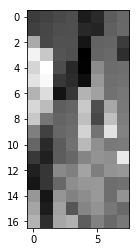

In [29]:
plt.imshow(img_pred, cmap='gray');

Max-pooling layers are useful in tasks of object recognition, since pixels in feature maps represent the "degree of matching" of a filter with a receptive field, keeping the max keeps the highest matching feature. 

On the other hand, if we are also interested in the location of a particular match, then we shouldn't be using max-pooling, because we lose the location information in the pooling operation. 

Thus, for example, if we are using a Convolutional Neural Network to read the state of a video game from a frame, we need to know the exact positions of players and thus using max-pooling is not recommended.

Finally `GlobalMaxPooling2D` calculates the global max in the image, so it returns a single value for the image:

In [30]:
model = Sequential()
model.add(Conv2D(1, (11,11), kernel_initializer='ones',
                 padding = 'same',
                 strides = (6, 13),
                 input_shape=(512, 512, 1)))


model.add(GlobalMaxPooling2D(input_shape=(86, 40, 1)))

model.compile('adam', 'mse')
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 86, 40, 1)         122       
_________________________________________________________________
global_max_pooling2d (Global (None, 1)                 0         
Total params: 122
Trainable params: 122
Non-trainable params: 0
_________________________________________________________________


In [31]:
img_pred_tensor = model.predict(img_tensor)
img_pred_tensor.shape

(1, 1)